In [ ]:
import pandas as pd
import numpy as np
# Plotting.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_formats = ['svg']

## Fitting a linear regression model with Gradient Descent.

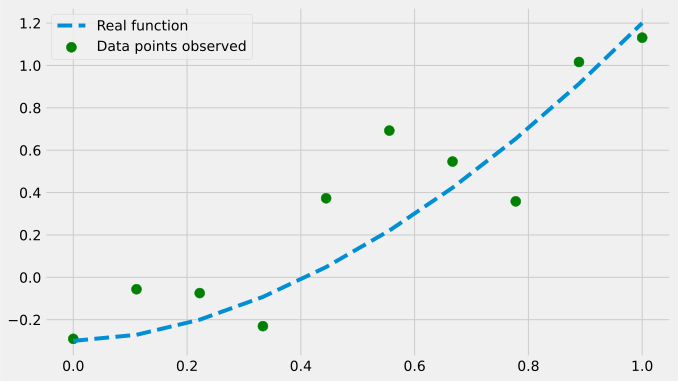

In [ ]:
#@title We generate datapoints from a polynomial function.
n_points = 10
noise_magnitude = 0.2

x = np.linspace(0.0, 1.0, n_points)
x.sort()

y_real = 1.5 * x ** 1.8 - 0.3

# We add some artificial noise, as it is quite common to train on noisy data.
y = y_real + noise_magnitude * np.random.normal(size=n_points)

plt.plot(x, y_real, '--', label='Real function')
plt.scatter(x, y, s=100, c='g', label='Data points observed')
_ = plt.legend(loc='best')

In [ ]:
#@title Defining our linear model, its cost function, and a way to display its predictions.
def linear_regression(x, w, b):
  return x * w + b

def mean_squared_error(y, y_pred):
  return ((y - y_pred)**2).mean() / 2.0

def plot_linear_regression(x, y, y_pred):
  plt.ylim((-2.0, 2.0))
  error = y - y_pred
  mse = mean_squared_error(y, y_pred).round(2)
  plt.fill_between(x, y, y_pred, color='r', alpha=0.25, label=f'Error (MSE = {mse})')
  plt.bar(x, error, width=0.005, bottom=y_pred, color='red', alpha=0.25)
  plt.scatter(x, y, s=100, c='g', label='Data points')
  plt.plot(x, y_pred, '--', label='Linear regression')
  _ = plt.legend(loc='best')

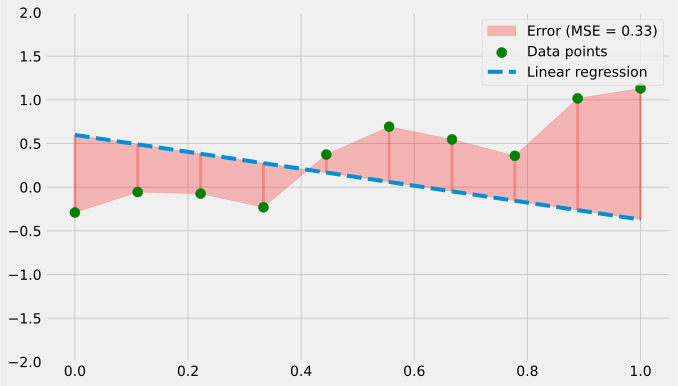

In [ ]:
#@title Initializing weights randomly.
w_0 = np.random.normal()
b_0 = np.random.normal()

# Display the initial model.
y_pred = linear_regression(x, w_0, b_0)
plot_linear_regression(x, y, y_pred)

In [ ]:
def gradient_descent(x, y, w_0, b_0, learning_rate, iterations=10):
  weights = [(w_0, b_0)]
  errors = []
  for i in range(iterations):
    w, b = weights[-1]
    # We calculate the model's prediction / error with the latest weights.
    y_pred = linear_regression(x, w, b)
    error = mean_squared_error(y, y_pred)
    # We update the weights based on the error at this step.
    w = w - learning_rate * np.dot(x, y_pred - y) / len(x)
    b = b - learning_rate * (y_pred - y).mean()
    # We store the weights/error for later use.
    weights.append((w, b))
    errors.append(error)
  w, b = weights[-1]
  errors.append(mean_squared_error(y, linear_regression(x, w, b)))
  return weights, errors

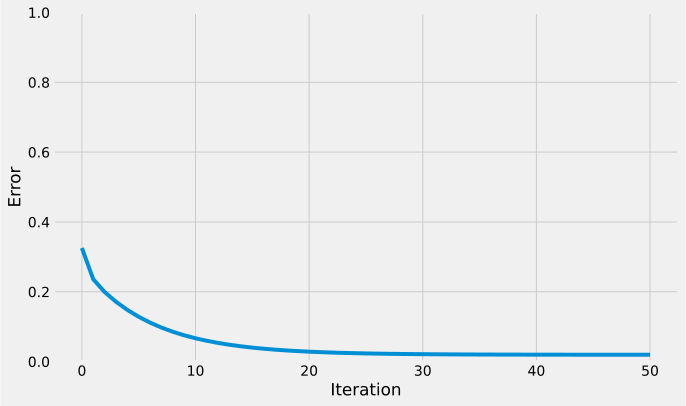

In [ ]:
#@title Visualize the evolution of the error throughout the gradient descent process.
iterations = 50
weights, errors = gradient_descent(x, y, w_0, b_0, learning_rate=1.0, iterations=iterations)
plt.plot(range(iterations + 1), errors)
plt.xlabel("Iteration")
plt.ylabel("Error")
_ = plt.ylim((0, 1.0))

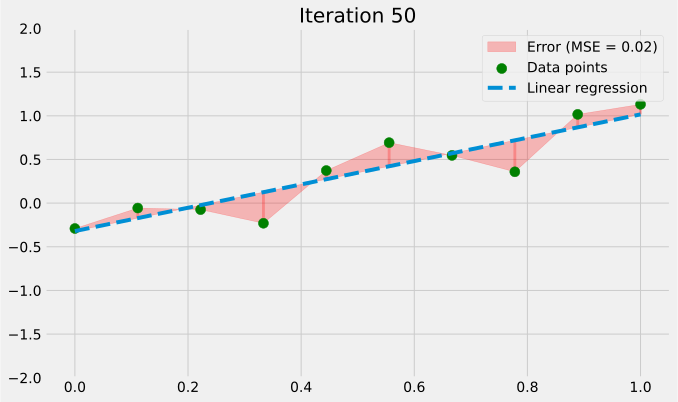

In [ ]:
#@title Visualize the weights at different iterations.
from IPython.display import clear_output
import time

for n_iter, ((w, b), error) in enumerate(zip(weights, errors)):
  clear_output(wait=True)
  y_pred = linear_regression(x, w, b)
  plot_linear_regression(x, y, y_pred)
  plt.title(f"Iteration {n_iter}")
  plt.show()
  time.sleep(1.0 if n_iter < 10 else 0.0)

## Linear Regression on real-world data.

In [ ]:
!wget https://github.com/Harshal2894/-House-Prices-Advanced-Regression-Techniques/raw/master/train.csv

--2020-05-20 17:49:58--  https://github.com/Harshal2894/-House-Prices-Advanced-Regression-Techniques/raw/master/train.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Harshal2894/-House-Prices-Advanced-Regression-Techniques/master/train.csv [following]
--2020-05-20 17:49:58--  https://raw.githubusercontent.com/Harshal2894/-House-Prices-Advanced-Regression-Techniques/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>] 449.88K  --.-KB/s    in 0.07s   

2020-05-20 17:49:59 (6.74 MB/s) - ‘t

In [ ]:
df = pd.read_csv('train.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
838,839,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1995,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1099,1099,GasA,...,Y,SBrkr,1099,0,0,1099,0,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1999.0,Unf,1,352,TA,TA,Y,278,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,144000
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,8,9,1935,1997,Gable,CompShg,Stucco,Stucco,BrkFace,632.0,TA,Gd,CBlock,TA,TA,Mn,Rec,192,Unf,0,536,728,GasA,...,Y,SBrkr,1968,1479,0,3447,0,0,3,1,4,1,Gd,11,Typ,2,Gd,BuiltIn,1982.0,Unf,3,1014,TA,TA,Y,314,12,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
219,220,120,RL,43.0,3010,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1232,1248,GasA,...,Y,SBrkr,1248,0,0,1248,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2005.0,Fin,2,438,TA,TA,Y,108,0,0,0,0,0,NaN,NaN,NaN,0,3,2006,New,Partial,167240
1433,1434,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,318.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,936,936,GasA,...,Y,SBrkr,962,830,0,1792,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,2000.0,Fin,2,451,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,186500
506,507,60,RL,80.0,9554,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,8,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,BrkFace,125.0,Gd,TA,PConc,Gd,TA,No,GLQ,380,Unf,0,397,777,GasA,...,Y,SBrkr,1065,846,0,1911,0,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1993.0,RFn,2,471,TA,TA,Y,182,81,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,215000


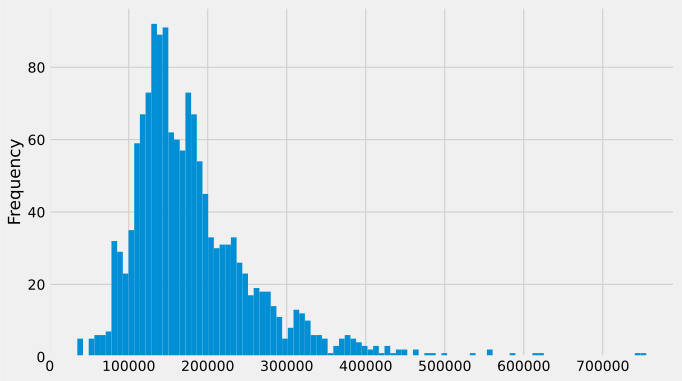

In [ ]:
df.SalePrice.plot.hist(bins=100)

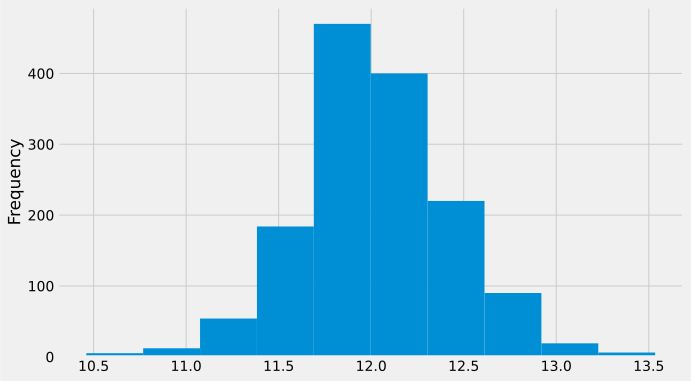

In [ ]:
target = np.log(df['SalePrice'])
target.plot.hist()

In [ ]:
numeric_features = df[['OverallQual', 'GrLivArea']]
numeric_features.sample(5)

,OverallQual,GrLivArea
709,5,904
854,5,1779
1080,6,1258
764,8,1494
985,5,1164


In [ ]:
categorical_features = df[['MSZoning', 'Neighborhood']]
categorical_features.head()

,MSZoning,Neighborhood
0,RL,CollgCr
1,RL,Veenker
2,RL,CollgCr
3,RL,Crawfor
4,RL,NoRidge


In [ ]:
features = pd.concat([numeric_features, pd.get_dummies(categorical_features)], axis=1)
features = (features - features.mean()) / features.std()
features.head()

,OverallQual,GrLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.651256,0.370207,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,-0.203325,-0.139784,2.954209,-0.190187,-0.27107,-0.239094,-0.161194,-0.108503,-0.186288,-0.426687,-0.07873,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
1,-0.071812,-0.482347,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,-0.203325,-0.139784,-0.338268,-0.190187,-0.27107,-0.239094,-0.161194,-0.108503,-0.186288,-0.426687,-0.07873,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,11.473319
2,0.651256,0.514836,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,-0.203325,-0.139784,2.954209,-0.190187,-0.27107,-0.239094,-0.161194,-0.108503,-0.186288,-0.426687,-0.07873,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
3,0.651256,0.383528,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,-0.203325,-0.139784,-0.338268,5.254382,-0.27107,-0.239094,-0.161194,-0.108503,-0.186288,-0.426687,-0.07873,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
4,1.374324,1.298881,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,-0.203325,-0.139784,-0.338268,-0.190187,-0.27107,-0.239094,-0.161194,-0.108503,-0.186288,-0.426687,-0.07873,-0.229337,5.880991,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

baseline = DummyRegressor()
baseline.fit(x_train, y_train)
mean_squared_error(y_test, baseline.predict(x_test))

0.14877147033553434

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
mean_squared_error(y_test, model.predict(x_test))

0.030544521778323667

In [ ]:
len(features.columns)

32

In [ ]:
len(model.coef_)

32

In [ ]:
model.coef_

array([ 1.53635827e-01,  1.51958575e-01, -1.18948064e+11, -2.97452182e+11,
       -1.50147106e+11, -5.89101703e+11, -5.13999174e+11,  9.89401207e+10,
        3.41121089e+10,  9.60192695e+10,  1.80136953e+11,  1.26492663e+11,
        2.80024537e+11,  1.69338378e+11,  2.32961559e+11,  2.08653270e+11,
        1.44949967e+11,  9.89401207e+10,  1.66102572e+11,  3.32996407e+11,
        7.21887914e+10,  2.01008522e+11,  1.52369463e+11,  2.06144268e+11,
        2.46455111e+11,  1.19649466e+11,  2.02307640e+11,  1.81618416e+11,
        2.17148784e+11,  1.19649466e+11,  1.46844068e+11,  7.97526909e+10])

Text(0.5, 0, 'Variable coefficient')

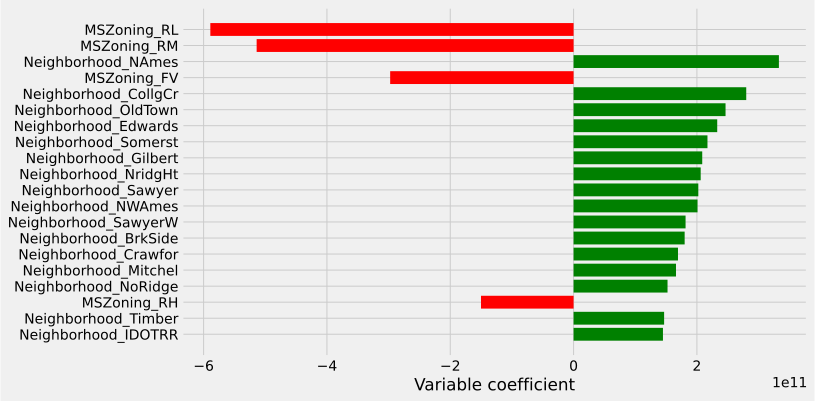

In [ ]:
top_n = 20
top_feature_indices = np.abs(model.coef_).argsort()[-top_n:]
top_coefficients = model.coef_[top_feature_indices]
plt.barh(range(top_n), top_coefficients, color=['r' if v < 0 else 'g' for v in top_coefficients])
_ = plt.yticks(range(top_n), features.columns[top_feature_indices])
plt.xlabel("Variable coefficient")